In [2]:
%matplotlib inline

import random
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from scipy import stats
import seaborn

## Reading the Data into Memory

In [3]:
data = pd.read_csv('C:/Py_game_and_ML/cycle-share-dataset/trip.csv', error_bad_lines = False)

Skipping line 50794: expected 12 fields, saw 20



## Printing Size of the Dataset and Printing First Few Rows


In [4]:
print len(data)
data.head()

286857


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


## Performing Univariate Analysis

## Determining the Time Range of the Dataset

In [5]:
data = data.sort_values(by='starttime')
data.reset_index()
print 'Date range of dataset: %s - %s'%(data.loc[1, 'starttime'], data.loc[len(data)-1, 'stoptime'])


Date range of dataset: 10/13/2014 10:32 - 9/1/2016 0:20


## Plotting the Distribution of User Types

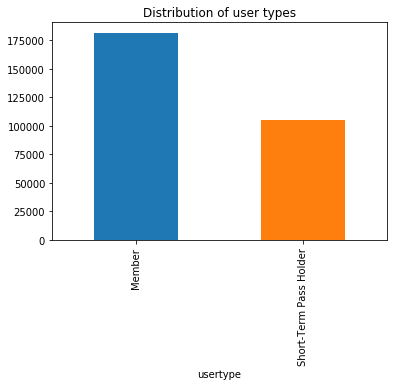

In [6]:
groupby_user = data.groupby('usertype').size()
groupby_user.plot.bar(title = 'Distribution of user types')

## Plotting the distribution of Gender

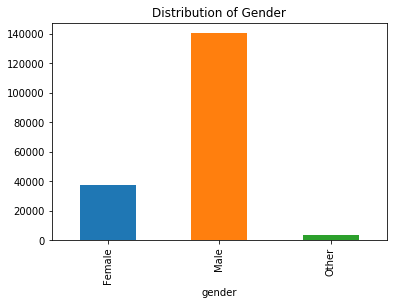

In [7]:
groupby_gender = data.groupby('gender').size()
groupby_gender.plot.bar(title = 'Distribution of Gender')

## Plotting the Distribution of Birth Years

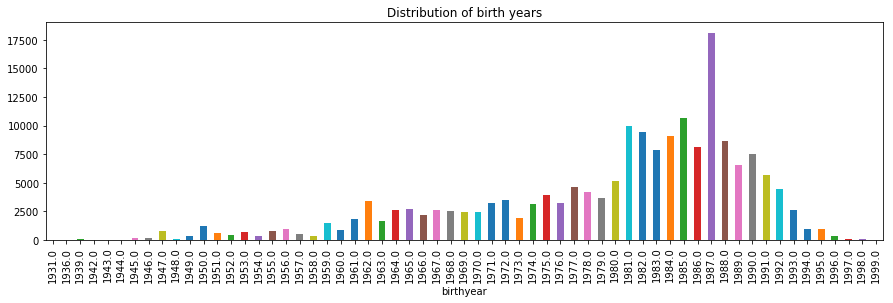

In [8]:
data = data.sort_values(by='birthyear')
groupby_birthyear = data.groupby('birthyear').size()
groupby_birthyear.plot.bar(title = 'Distribution of birth years', figsize = (15, 4))

## Plotting the Frequency of Member Types for Millenials

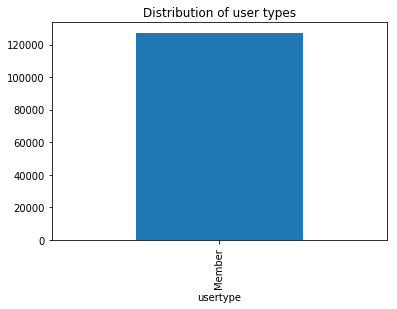

In [9]:
data_mil = data[(data['birthyear'] >= 1977) & (data['birthyear'] <=1994)]
groupby_mil = data_mil.groupby('usertype').size()
groupby_mil.plot.bar(title = 'Distribution of user types')

## Performing Multivariate Analysis

## Plotting the Distribution of Birth Years by Gender Type

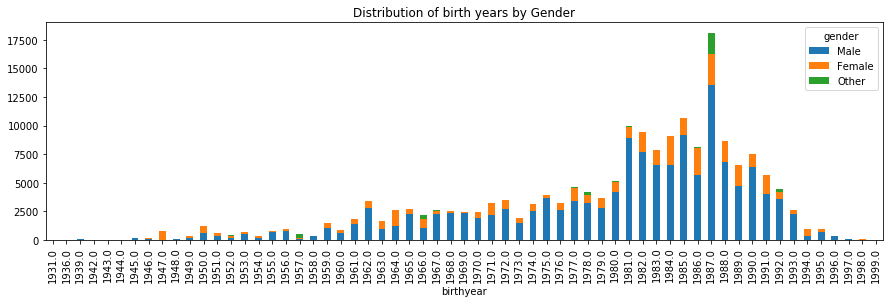

In [10]:
groupby_birthyear_gender = data.groupby(['birthyear', 'gender'])['birthyear'].count().unstack('gender').fillna(0)
groupby_birthyear_gender[['Male','Female','Other']].plot.bar(title = 'Distribution of birth years by Gender', \
                                                             stacked=True, figsize = (15,4))

## Plotting the Distribution of Birth Years by User Types

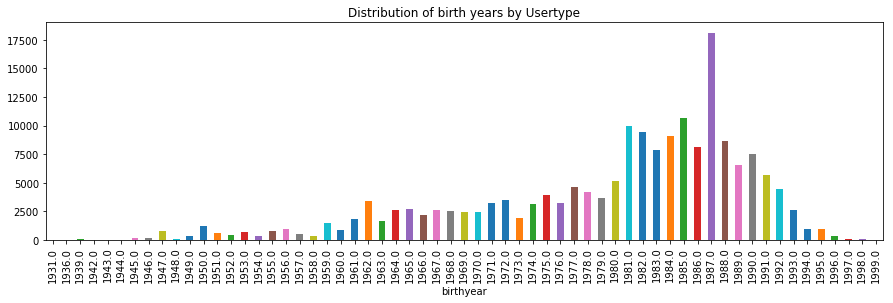

In [12]:
groupby_birthyear_usertype = data.groupby(['birthyear', 'usertype'])['birthyear'].count().unstack('usertype').fillna(0)
groupby_birthyear_usertype['Member'].plot.bar(title = 'Distribution of birth years by Usertype', \
                                                             stacked=True, figsize = (15,4))

## Validation If We Don’t Have Birth Year Available for Short-Term Pass Holders

In [14]:
data[data['usertype']=='Short-Term Pass Holder']['birthyear'].isnull().values.all()

True

## Validation If We Don’t Have Gender Available for Short-Term Pass Holders

In [15]:
data[data['usertype']=='Short-Term Pass Holder']['gender'].isnull().values.all()

True

## Converting String to datetime, and Deriving New Features

In [16]:
List_ = list(data['starttime'])
List_ = [datetime.datetime.strptime(x, "%m/%d/%Y %H:%M") for x in List_]
data['starttime_mod'] = pd.Series(List_,index=data.index)
data['starttime_date'] = pd.Series([x.date() for x in List_],index=data.index)
data['starttime_year'] = pd.Series([x.year for x in List_],index=data.index)
data['starttime_month'] = pd.Series([x.month for x in List_],index=data.index)
data['starttime_day'] = pd.Series([x.day for x in List_],index=data.index)
data['starttime_hour'] = pd.Series([x.hour for x in List_],index=data.index)

In [25]:
#List_
#data['starttime_mod']
#data['starttime_date']
#data['starttime_year']
#data['starttime_month']
#data['starttime_day']
#data['starttime_hour']

263685   2016-07-08 16:22:00
167620   2015-08-15 17:27:00
184489   2015-09-20 16:06:00
184522   2015-09-20 17:04:00
64094    2014-11-23 16:46:00
13302    2014-11-23 16:46:00
168215   2015-08-16 17:21:00
230356   2016-04-03 19:02:00
167649   2015-08-15 18:07:00
138761   2015-06-28 11:35:00
234697   2016-04-18 11:52:00
138788   2015-06-28 12:18:00
255802   2016-06-19 11:34:00
106713   2015-04-26 10:58:00
247229   2016-05-26 18:21:00
109700   2015-05-03 11:49:00
279556   2016-08-14 13:22:00
253736   2016-06-13 18:48:00
113249   2015-05-10 11:00:00
164040   2015-08-09 13:20:00
246619   2016-05-24 18:32:00
164014   2015-08-09 12:38:00
178215   2015-09-06 13:55:00
113640   2015-05-11 06:13:00
249515   2016-06-02 18:17:00
113264   2015-05-10 11:46:00
227714   2016-03-26 12:15:00
247805   2016-05-29 11:15:00
271875   2016-07-27 18:36:00
124750   2015-06-02 16:01:00
                 ...        
179763   2015-09-09 20:38:00
179765   2015-09-09 20:45:00
179766   2015-09-09 20:46:00
179767   2015-

## Plotting the Distribution of Trip Duration over Daily Time

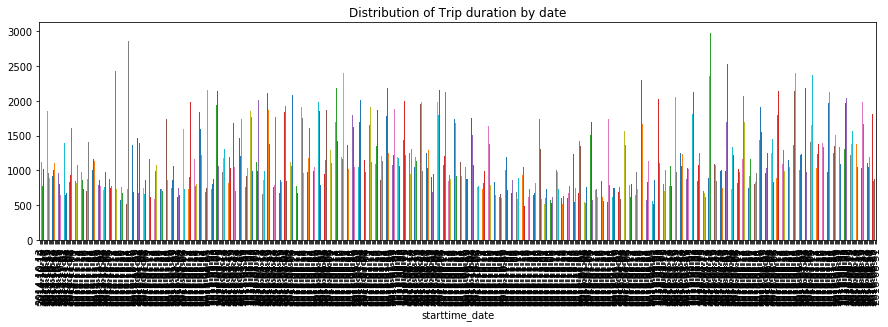

In [27]:
data.groupby('starttime_date')['tripduration'].mean().plot.bar(title =\
                                                               'Distribution of Trip duration by date', figsize = (15,4))

## Short exercise

** Determine the distribution of number of trips by year. Do you
see a specific pattern? **

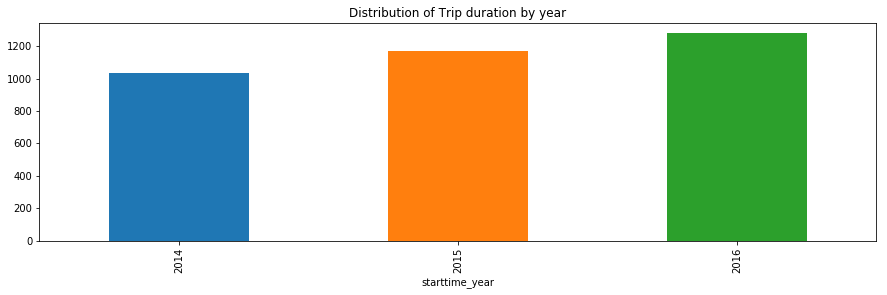

In [28]:
data.groupby('starttime_year')['tripduration'].mean().plot.bar(title =\
                                                               'Distribution of Trip duration by year', figsize = (15,4))

** Determine the distribution of number of trips by month. Do you see a specific pattern? **

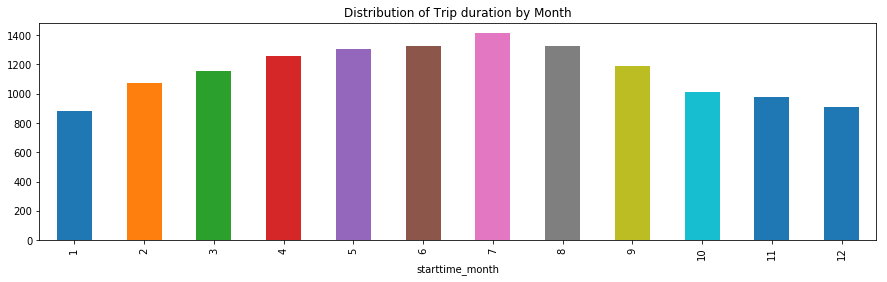

In [29]:
data.groupby('starttime_month')['tripduration'].mean().plot.bar(title =\
                                                               'Distribution of Trip duration by Month', figsize = (15,4))

** Determine the distribution of number of trips by day. Do you see a specific pattern? **

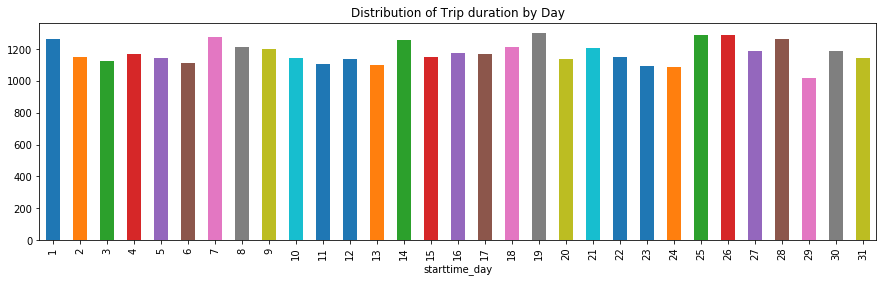

In [30]:
data.groupby('starttime_day')['tripduration'].mean().plot.bar(title =\
                                                               'Distribution of Trip duration by Day', figsize = (15,4))

** Determine the distribution of number of trips by hour. Do you see a specific pattern? **

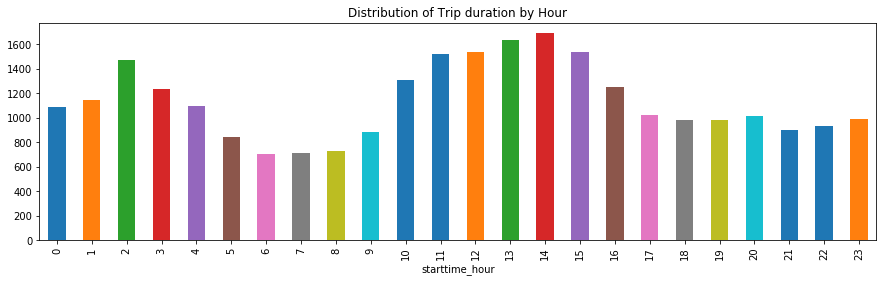

In [31]:
data.groupby('starttime_hour')['tripduration'].mean().plot.bar(title =\
                                                               'Distribution of Trip duration by Hour', figsize = (15,4))

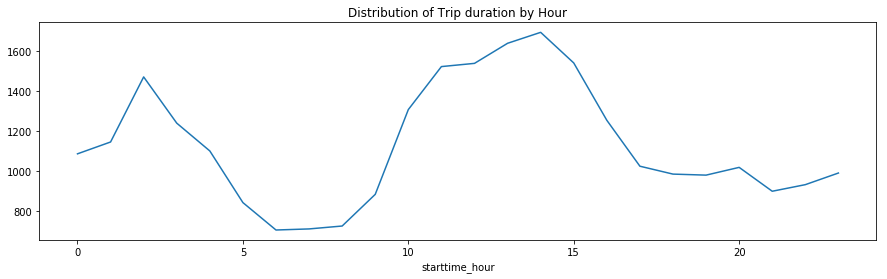

In [34]:
data.groupby('starttime_hour')['tripduration'].mean().plot.line(title =\
                                                               'Distribution of Trip duration by Hour', figsize = (15,4))

## Numpy Examples

In [36]:
def f(x,y):
    return 10*x+y

b = np.fromfunction(f,(5,4),dtype=int)
b


array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [39]:
b[-1]

array([40, 41, 42, 43])

In [42]:
b[-1][-1]

43

In [44]:
b[-1][3]

43

In [45]:
c = np.array( [[[  0,  1,  2],               # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])

c.shape

(2L, 2L, 3L)

In [46]:
c[1,...]                                   # same as c[1,:,:] or c[1]


array([[100, 101, 102],
       [110, 112, 113]])

In [47]:
c[0,...]

array([[ 0,  1,  2],
       [10, 12, 13]])

In [55]:
c[0][0]

array([0, 1, 2])

In [56]:
c[0][1]

array([10, 12, 13])

In [57]:
c[0][1][1]

12

In [51]:
c[1][0]

array([100, 101, 102])

In [52]:
c[1][0][-1]

102

In [53]:
c[1][0][2]

102

In [61]:
np.hsplit(c, 2)

[array([[[  0,   1,   2]],
 
        [[100, 101, 102]]]), array([[[ 10,  12,  13]],
 
        [[110, 112, 113]]])]

In [62]:
np.vsplit(c, 2)

[array([[[ 0,  1,  2],
         [10, 12, 13]]]), array([[[100, 101, 102],
         [110, 112, 113]]])]

In [64]:
np.vstack(c)

array([[  0,   1,   2],
       [ 10,  12,  13],
       [100, 101, 102],
       [110, 112, 113]])

In [65]:
c = np.vstack(c)
c

array([[  0,   1,   2],
       [ 10,  12,  13],
       [100, 101, 102],
       [110, 112, 113]])

In [66]:
np.hstack(c)

array([  0,   1,   2,  10,  12,  13, 100, 101, 102, 110, 112, 113])

In [67]:
c = np.hstack(c)
c

array([  0,   1,   2,  10,  12,  13, 100, 101, 102, 110, 112, 113])

In [69]:
np.array_split(c, 3, axis=0)

[array([ 0,  1,  2, 10]),
 array([ 12,  13, 100, 101]),
 array([102, 110, 112, 113])]

In [72]:
c = np.array( [[[  0,  1,  2],               # a 3D array (two stacked 2D arrays)
                [ 10, 12, 13]],
               [[100,101,102],
                [110,112,113]]])

np.array_split(c, 2, axis = 1)

[array([[[  0,   1,   2]],
 
        [[100, 101, 102]]]), array([[[ 10,  12,  13]],
 
        [[110, 112, 113]]])]

In [75]:
a = np.arange(18)

def f(x):
    print(id(x))

id(a)                           # id is a unique identifier of an object

f(a)


605039632


In [78]:
help(print)

SyntaxError: invalid syntax (<ipython-input-78-f378dd5d1dcd>, line 1)

In [86]:


w = np.zeros(4 + c.shape[1])
w

array([0., 0., 0., 0.])

In [87]:
w = np.zeros(4 + c.shape[1])
w

array([0., 0., 0., 0., 0., 0.])

In [88]:
w = np.zeros(1 + c.shape[1])
w

array([0., 0., 0.])

In [89]:
c.shape

(2L, 2L, 3L)

In [90]:
w = np.zeros(1 + c.shape[0])
w

array([0., 0., 0.])

In [95]:
w = np.zeros(4 + c.shape[0])
w

array([0., 0., 0., 0., 0., 0.])

In [96]:
c.shape[0]

2L

In [97]:
c.shape[1]

2L

In [98]:
c.shape[2]

3L

In [99]:
w = np.zeros(1 + c.shape[2])
w

array([0., 0., 0., 0.])

In [112]:
w = np.ones(c.shape[2])
np.vstack(w)

array([[1.],
       [1.],
       [1.]])

### meshgrid numpy in action

In [113]:
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

In [114]:
xx, yy = np.meshgrid(xvalues, yvalues)

In [115]:
xx, yy

(array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4]]))

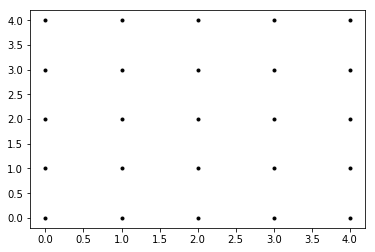

In [116]:
plt.plot(xx, yy, marker='.', color='k', linestyle='none')

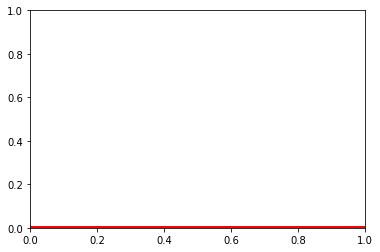

In [121]:
plt.axhline(linewidth=4, color='r')